## Analysis: By feature and model
### Training on augmented data, Testing on untransformed data

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Torch Models

In [56]:
V_stft = pd.read_csv('../src/predict/predictions/vanilla_test_stft.csv', names=['Pred'])
true_V_stft = pd.read_csv('../src/predict/predictions/true_vanilla_test_stft.csv', names=['True'])

V_mfcc = pd.read_csv('../src/predict/predictions/vanilla_test_mfcc.csv', names=['Pred'])
true_V_mfcc = pd.read_csv('../src/predict/predictions/true_vanilla_test_mfcc.csv', names=['True'])

OH_stft = pd.read_csv('../src/predict/predictions/one_hidden_test_stft.csv', names=['Pred'])
true_OH_stft = pd.read_csv('../src/predict/predictions/true_one_hidden_test_stft.csv', names=['True'])

OH_mfcc = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc.csv', names=['Pred'])
true_OH_mfcc = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc.csv', names=['True'])

In [58]:
vanilla_stft_results = pd.concat([V_stft, true_V_stft], axis = 1)
vanilla_mfcc_results = pd.concat([V_mfcc, true_V_mfcc], axis = 1)
one_hidden_stft_results = pd.concat([OH_stft, true_OH_stft], axis = 1)
one_hidden_mfcc_results = pd.concat([OH_mfcc, true_OH_mfcc], axis = 1)

In [83]:
df_list = [vanilla_stft_results, vanilla_mfcc_results, one_hidden_stft_results, one_hidden_mfcc_results]
acc_list = []
for df in df_list:
    acc_list.append(accuracy_score(y_true=df['True'], y_pred=df['Pred']))

In [101]:
torch_results = pd.DataFrame(acc_list, columns=['Accuracy'])
torch_results.index = ['Linear_stft', 'Linear_mfcc', '1_hidden_stft', '1_hidden_mfcc']

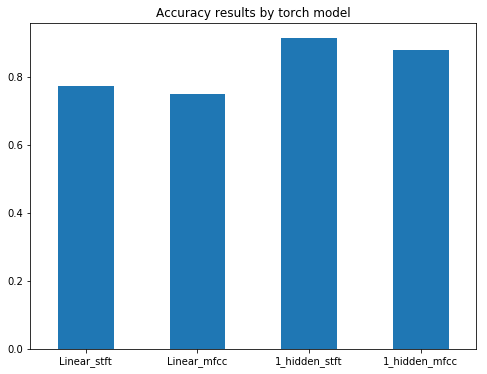

In [142]:
ax = torch_results.plot.bar(legend=False, rot=0, figsize=(8,6))
ax.set_title('Accuracy results by torch model');

**Conclusion:** Using the Short-time Fourier Transform as input feature yields better results than Mel-frequency Cepstral Coefficients (num_ceps=20) for both the linear and non-linear torch models. Perhaps a combination of these features could yield an even better result.

## sklearn Models (Logistic Regression, Random Forest)

In [125]:
SK_stft = pd.read_csv('../../../Source/Data/results_sklearn_augmented_stft.csv')
SK_mfcc = pd.read_csv('../../../Source/Data/results_sklearn_augmented_mfcc.csv')

In [129]:
acc_stft_lr = accuracy_score(y_pred=SK_stft['Predict_lr'], y_true=SK_stft['True'])
acc_stft_rf = accuracy_score(y_pred=SK_stft['Predict_rf'], y_true=SK_stft['True'])
acc_mfcc_lr = accuracy_score(y_pred=SK_mfcc['Predict_lr'], y_true=SK_mfcc['True'])
acc_mfcc_rf = accuracy_score(y_pred=SK_mfcc['Predict_rf'], y_true=SK_mfcc['True'])

In [144]:
sklearn_results = pd.DataFrame([acc_stft_lr,acc_mfcc_lr, acc_stft_rf, acc_mfcc_rf], columns=['Accuracy'])
sklearn_results.index = ['LogReg_stft', 'LogReg_mfcc', 'RndFst_stft','RndFst_mfcc']

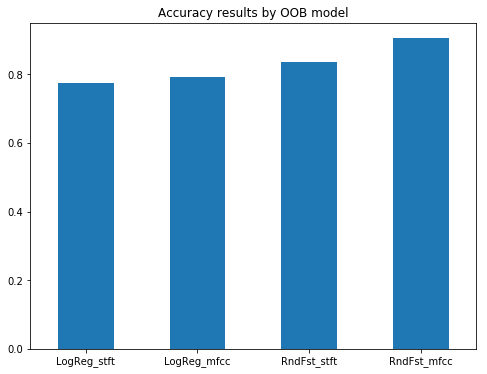

In [145]:
ax = sklearn_results.plot.bar(legend=False, rot=0, figsize=(8,6))
ax.set_title('Accuracy results by OOB model');

**Conclusion:** Using the Short-time Fourier Transform as input feature yields ***worse*** results than Mel-frequency Cepstral Coefficients (num_ceps=20) for both the linear and non-linear sklearn models. In fact, the Random Forest model using MFCCs yields the best result of all the out-of-the-box methods.